**Chapter 10 – Building Neural Networks with PyTorch**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/10_neural_nets_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/10_neural_nets_with_pytorch.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

Are we using Colab or Kaggle?

In [3]:
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

If using Colab, a couple libraries are not pre-installed so we must install them manually:

In [4]:
if IS_COLAB:
    %pip install -q optuna torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 39.3 MB/s eta 0:00:00


And of course we need PyTorch, specifically PyTorch ≥ 2.6.0:

In [5]:
import torch

assert Version(torch.__version__) >= Version("2.6.0")

As we did in earlier chapters, let's define the default font sizes to make the figures prettier:

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PyTorch Fundamentals
## PyTorch Tensors

In [7]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [8]:
X.shape

torch.Size([2, 3])

In [9]:
X.dtype

torch.float32

In [10]:
X[0, 1]

tensor(4.)

In [11]:
X[:, 1]

tensor([4., 3.])

In [12]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [13]:
X.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [14]:
X.mean()

tensor(3.8333)

In [15]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [16]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [17]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [18]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [19]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [20]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [21]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

In [22]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [23]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

PyTorch tensors really resemble NumPy arrays. In fact, they have over 200 common functions!

In [24]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## Hardware Acceleration

In [25]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'cuda'

In [26]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='cuda', index=0)

In [27]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [28]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [29]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

16.1 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
549 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Autograd

Consider a simple function, $f(x) = x^2$.
Calculus tells us that the derivative of this function is $f'(x)=2x$. Let's evaluate $f(5)$ and the derivative $f'(5)$ using autograd. We expect to find $f(5)=5^2=25$ and $f'(5)=2*5=10$. Let's see!

In [30]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [31]:
f.backward()
x.grad

tensor(10.)

In [32]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [33]:
x

tensor(4., requires_grad=True)

Alternatively, we could have used this code for the gradient descent step (but using `no_grad()` is more common for this):

In [34]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

In [35]:
x.grad.zero_()

tensor(0.)

Let's put everything together to get our training loop:

In [36]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

The variable `x` gets pushed towards 0, since that's the value that minimizes $f(x) = x^2$:

In [37]:
x

tensor(1.0185e-09, requires_grad=True)

# Implementing Linear Regression
## Linear Regression Using Tensors & Autograd

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [39]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

PyTorch expects the targets to have one row per sample, so let's reshape the targets to be column vectors:

In [40]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [41]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

**Note**: in the next section, we will build an almost identical model using PyTorch's high-level API. Its results will be slightly different because it will use a different parameter initialization method: it will use a uniform random distribution from $-\frac{1}{2\sqrt 2}$ to $+\frac{1}{2\sqrt 2}$ to initialize both the weights and the bias term. If you want to get exactly the same result here as in the next section, you can uncomment and run the initialization code in the following cell, instead of the code in the previous cell:

In [42]:
# torch.manual_seed(42)
# n_features = X_train.shape[1]  # there are 8 input features
# r = 2 ** -1.5  # this is equal to 1 / 2√2
# w = torch.empty(n_features, 1).uniform_(-r, r)
# b = torch.empty(1).uniform_(-r, r)
# w.requires_grad_(True)
# b.requires_grad_(True)

In [43]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.8793745040893555
Epoch 3/20, Loss: 2.255225419998169
Epoch 4/20, Loss: 1.3307634592056274
Epoch 5/20, Loss: 0.9680691957473755
Epoch 6/20, Loss: 0.8142675757408142
Epoch 7/20, Loss: 0.7417045831680298
Epoch 8/20, Loss: 0.7020701169967651
Epoch 9/20, Loss: 0.6765918731689453
Epoch 10/20, Loss: 0.6577965021133423
Epoch 11/20, Loss: 0.6426151990890503
Epoch 12/20, Loss: 0.6297222971916199
Epoch 13/20, Loss: 0.6184942126274109
Epoch 14/20, Loss: 0.6085968613624573
Epoch 15/20, Loss: 0.5998216867446899
Epoch 16/20, Loss: 0.592018723487854
Epoch 17/20, Loss: 0.5850691795349121
Epoch 18/20, Loss: 0.578873336315155
Epoch 19/20, Loss: 0.573345422744751
Epoch 20/20, Loss: 0.5684100389480591


In [44]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [45]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's High-Level API

In [46]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

In [47]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [48]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [49]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [50]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [52]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [53]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.7802939414978027
Epoch 3/20, Loss: 0.6253842115402222
Epoch 4/20, Loss: 0.6060433983802795
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.587356686592102
Epoch 7/20, Loss: 0.5802990794181824
Epoch 8/20, Loss: 0.5741382837295532
Epoch 9/20, Loss: 0.5687101483345032
Epoch 10/20, Loss: 0.5639079809188843
Epoch 11/20, Loss: 0.5596511363983154
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525194406509399
Epoch 14/20, Loss: 0.5495392084121704
Epoch 15/20, Loss: 0.5468900203704834
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405716300010681
Epoch 19/20, Loss: 0.5389097332954407
Epoch 20/20, Loss: 0.5374288558959961


In [54]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Implementing a Regression MLP

In [55]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [56]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523123741149902
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225847244262695
Epoch 7/20, Loss: 0.6893726587295532
Epoch 8/20, Loss: 0.6669032573699951
Epoch 9/20, Loss: 0.6507738828659058
Epoch 10/20, Loss: 0.6383934020996094
Epoch 11/20, Loss: 0.6281993389129639
Epoch 12/20, Loss: 0.6193399429321289
Epoch 13/20, Loss: 0.6113173365592957
Epoch 14/20, Loss: 0.6038705706596375
Epoch 15/20, Loss: 0.5968307852745056
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.5836468935012817
Epoch 18/20, Loss: 0.5774063467979431
Epoch 19/20, Loss: 0.5713554620742798
Epoch 20/20, Loss: 0.565444827079773


# Implementing Mini-Batch Gradient Descent using DataLoaders

In [57]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [58]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [59]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [60]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# Model Evaluation

In [61]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

In [62]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080, device='cuda:0')

In [63]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668, device='cuda:0')

In [64]:
valid_mse.sqrt()

tensor(0.6388, device='cuda:0')

In [65]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388, device='cuda:0')

In [66]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [67]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388, device='cuda:0')

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5846, valid metric: 0.6043
Epoch 11/20, train loss: 0.3401, train metric: 0.5831, valid metric: 0.5882
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5873
Epoch 14/20, train lo

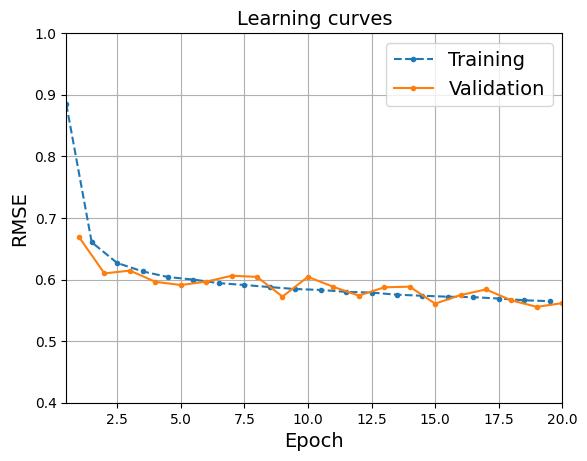

In [68]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

# Building Nonsequential Models Using Custom Modules

In [69]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [70]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

In [71]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

In [72]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5]
        X_deep = X[:, 2:]
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [73]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [74]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## Building Models with Multiple Inputs

In [75]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [76]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

In [77]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

In [78]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

In [79]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [80]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

## Building Models with Multiple Outputs

In [81]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

In [82]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0693, train metric: 0.9506, valid metric: 0.7085
Epoch 2/20, train loss: 0.5817, train metric: 0.6946, valid metric: 0.6607
Epoch 3/20, train loss: 0.5010, train metric: 0.6581, valid metric: 0.6425
Epoch 4/20, train loss: 0.4690, train metric: 0.6497, valid metric: 0.6654
Epoch 5/20, train loss: 0.4503, train metric: 0.6420, valid metric: 0.6338
Epoch 6/20, train loss: 0.4387, train metric: 0.6373, valid metric: 0.6563
Epoch 7/20, train loss: 0.4315, train metric: 0.6330, valid metric: 0.6193
Epoch 8/20, train loss: 0.4249, train metric: 0.6302, valid metric: 0.6167
Epoch 9/20, train loss: 0.4116, train metric: 0.6202, valid metric: 0.6450
Epoch 10/20, train loss: 0.4085, train metric: 0.6198, valid metric: 0.5938
Epoch 11/20, train loss: 0.4073, train metric: 0.6197, valid metric: 0.5959
Epoch 12/20, train loss: 0.3914, train metric: 0.6078, valid metric: 0.6073
Epoch 13/20, train loss: 0.3847, train metric: 0.6033, valid metric: 0.5815
Epoch 14/20, train lo

# Building an Image Classifier with PyTorch

## Using TorchVision to Load the Dataset

In [83]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.1MB/s]


In [84]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Each entry is a tuple (image, target):

In [85]:
X_sample, y_sample = train_data[0]

Each image has a shape \[channels, rows, columns\]. Grayscale images like in Fashion MNIST have a single channel (while RGB images have 3, and other types of images, such as satellite images, may have many more). Fashion images are grayscale and 28x28 pixels:

In [86]:
X_sample.shape

torch.Size([1, 28, 28])

In [87]:
X_sample.dtype

torch.float32

In [88]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

## Building the Classifier

In [89]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                        n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

In [90]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
           n_epochs)

Epoch 1/20, train loss: 0.6058, train metric: 0.7816, valid metric: 0.8416
Epoch 2/20, train loss: 0.4059, train metric: 0.8497, valid metric: 0.8372
Epoch 3/20, train loss: 0.3633, train metric: 0.8663, valid metric: 0.8530
Epoch 4/20, train loss: 0.3359, train metric: 0.8762, valid metric: 0.8660
Epoch 5/20, train loss: 0.3147, train metric: 0.8835, valid metric: 0.8754
Epoch 6/20, train loss: 0.2991, train metric: 0.8881, valid metric: 0.8666
Epoch 7/20, train loss: 0.2859, train metric: 0.8916, valid metric: 0.8622
Epoch 8/20, train loss: 0.2745, train metric: 0.8971, valid metric: 0.8722
Epoch 9/20, train loss: 0.2639, train metric: 0.9007, valid metric: 0.8834
Epoch 10/20, train loss: 0.2531, train metric: 0.9041, valid metric: 0.8810
Epoch 11/20, train loss: 0.2463, train metric: 0.9068, valid metric: 0.8850
Epoch 12/20, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8910
Epoch 13/20, train loss: 0.2303, train metric: 0.9125, valid metric: 0.8870
Epoch 14/20, train lo

In [91]:
model.eval()
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)  # index of the largest logit
y_pred

tensor([7, 4, 2], device='cuda:0')

In [92]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sneaker', 'Coat', 'Pullover']

Let's check whether the model made the correct predictions:

In [93]:
y_new[:3]

tensor([7, 4, 2])

All correct! 😃

In [94]:
import torch.nn.functional as F
y_proba = F.softmax(y_pred_logits, dim=1)
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000, 0.9110, 0.0000,
         0.0880],
        [0.0000, 0.0000, 0.0040, 0.0000, 0.9960, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.6250, 0.0000, 0.3350, 0.0000, 0.0390, 0.0000, 0.0000,
         0.0000]], device='cuda:0')

In [95]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
if device == "mps":
    y_top4_probas = y_top4_probas.cpu()
y_top4_probas.round(decimals=3)

tensor([[0.9110, 0.0880, 0.0010, 0.0000],
        [0.9960, 0.0040, 0.0000, 0.0000],
        [0.6250, 0.3350, 0.0390, 0.0000]], device='cuda:0')

In [96]:
y_top4_indices

tensor([[7, 9, 5, 8],
        [4, 2, 6, 0],
        [2, 4, 6, 0]], device='cuda:0')

In [97]:
sum([param.numel() for param in model.parameters()])

266610

# Hyperparameter Tuning using Optuna

In [98]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [99]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-10-07 07:20:53,727] A new study created in memory with name: no-name-27fd1323-5c92-43f9-8071-fa800aebc54b


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424


[I 2025-10-07 07:23:25,327] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.7992
Epoch 3/10, train loss: 0.5203, train metric: 0.8169, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4557, train metric: 0.8404, valid metric: 0.8352
Epoch 6/10, train loss: 0.4387, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8408
Epoch 8/10, train loss: 0.4123, train metric: 0.8566, valid metric: 0.8514
Epoch 9/10, train loss: 0.3998, train metric: 0.8601, valid metric: 0.8532


[I 2025-10-07 07:25:57,218] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3897, train metric: 0.8638, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2025-10-07 07:28:28,531] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2025-10-07 07:30:58,822] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7906
Epoch 6/10, train loss: 0.5687, train metric: 0.8053, valid metric: 0.8050
Epoch 7/10, train loss: 0.5386, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8214
Epoch 9/10, train loss: 0.4988, train metric: 0.8279, valid metric: 0.8220


[I 2025-10-07 07:33:29,943] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


In [100]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [101]:
study.best_value

0.8547999858856201

In [102]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

In [103]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [104]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [105]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2025-10-07 07:33:29,993] A new study created in memory with name: no-name-38c4ab57-e010-4c31-b3e6-9cf84c20adce


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6620
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2025-10-07 07:38:38,280] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7332
Epoch 1/1, train loss: 0.6133, train metric: 0.7864, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8136
Epoch 1/1, train loss: 0.4783, train metric: 0.8311, valid metric: 0.8232
Epoch 1/1, train loss: 0.4533, train metric: 0.8402, valid metric: 0.8020
Epoch 1/1, train loss: 0.4357, train metric: 0.8465, valid metric: 0.8446
Epoch 1/1, train loss: 0.4211, train metric: 0.8510, valid metric: 0.8276
Epoch 1/1, train loss: 0.4083, train metric: 0.8562, valid metric: 0.8398
Epoch 1/1, train loss: 0.3981, train metric: 0.8606, valid metric: 0.8532
Epoch 1/1, train loss: 0.3881, train metric: 0.8640, valid metric: 0.8582
Epoch 1/1, train loss: 0.3782, train metric: 0.8663, valid metric: 0.8532
Epoch 1/1, train loss: 0.3699, train metric: 0.8693, valid metric: 0.8566
Epoch 1/1, train loss: 0.3631, train m

[I 2025-10-07 08:32:19,547] Trial 16 finished with value: 0.8848000168800354 and parameters: {'learning_rate': 0.032666299131732864, 'n_hidden': 142}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2271, train metric: 0.9154, valid metric: 0.8800


[I 2025-10-07 08:32:35,221] Trial 17 pruned. 


Epoch 1/1, train loss: 1.5604, train metric: 0.5038, valid metric: 0.6536
Epoch 1/1, train loss: 0.6189, train metric: 0.7751, valid metric: 0.8314
Epoch 1/1, train loss: 0.4237, train metric: 0.8447, valid metric: 0.8492
Epoch 1/1, train loss: 0.3814, train metric: 0.8605, valid metric: 0.8582
Epoch 1/1, train loss: 0.3567, train metric: 0.8681, valid metric: 0.8622
Epoch 1/1, train loss: 0.3375, train metric: 0.8744, valid metric: 0.8674
Epoch 1/1, train loss: 0.3246, train metric: 0.8788, valid metric: 0.8480
Epoch 1/1, train loss: 0.3123, train metric: 0.8849, valid metric: 0.8644
Epoch 1/1, train loss: 0.3012, train metric: 0.8871, valid metric: 0.8734
Epoch 1/1, train loss: 0.2915, train metric: 0.8916, valid metric: 0.8760
Epoch 1/1, train loss: 0.2858, train metric: 0.8931, valid metric: 0.8758
Epoch 1/1, train loss: 0.2778, train metric: 0.8955, valid metric: 0.8804
Epoch 1/1, train loss: 0.2715, train metric: 0.8972, valid metric: 0.8616
Epoch 1/1, train loss: 0.2642, train m

[I 2025-10-07 08:37:45,329] Trial 18 finished with value: 0.8830000162124634 and parameters: {'learning_rate': 0.0954812841907134, 'n_hidden': 50}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8830


[I 2025-10-07 08:38:00,038] Trial 19 pruned. 


Epoch 1/1, train loss: 0.7417, train metric: 0.7395, valid metric: 0.7640


In [106]:
study.best_value

0.8867999911308289

In [107]:
study.best_params

{'learning_rate': 0.08525846269447772, 'n_hidden': 116}

# Saving and Loading a PyTorch Model

In [108]:
torch.save(model, "my_fashion_mnist.pt")

In [109]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)

In [110]:
loaded_model.eval()
y_pred_logits = loaded_model(X_new)

In [111]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [112]:
type(model.state_dict())

collections.OrderedDict

In [113]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [114]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [115]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# Compiling and Optimizing a PyTorch Model

In [116]:
torchscript_model = torch.jit.trace(model, X_new)

In [117]:
torchscript_model = torch.jit.script(model)

In [118]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [119]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [120]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [121]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ -3.3324,  -0.7572,  -4.1671,  -1.9444,  -1.6955,   2.0123,  -3.2624,
           8.6379,  -0.5685,   6.2972],
        [ -0.1434,  -3.8626,  11.8279,  -0.3164,  17.3995, -13.1888,   7.8158,
         -11.8338,  -1.4709,  -7.9412],
        [  0.3996,  -2.5537,   7.5992,   0.1775,   6.9748,  -6.1942,   4.8270,
          -5.8584,  -1.4327,  -4.3257]], device='cuda:0')

In [122]:
compiled_model = torch.compile(model)

In [123]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

W1007 08:38:10.662000 360 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


# Exercise solutions

## Work in progress

I'm working on the exercise solutions, hoping to finish them by December 2025. Thanks for your patience!